In [5]:
!pip install datapackage
!pip install geojson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 27.6 MB/s eta 0:00:00
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10745 sha256=8cd11b12c66336dacdc8e01d14910a3fdfbb39cfab42690ccf2dc6ca04f07bfd
  Stored in directory: /home/jovyan/.cache/pip/wheels/d8/c8/27/b237d3378d5c9ed25c2c63d9af1b3d5ccb99934f3dd030de87
  

In [2]:
import geojson
import xarray as xr
import numpy as np

In [6]:
from datapackage import Package

package = Package('https://datahub.io/core/geo-countries/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

/srv/conda/envs/notebook/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


['validation_report', 'geo-countries_zip', 'countries']


In [8]:
with open('countries.geojson',) as f:
    gj = geojson.load(f)

In [13]:
gj['features'][1]['properties']

{'ADMIN': 'Afghanistan', 'ISO_A3': 'AFG'}

In [16]:
for i, country in enumerate(gj['features']):
    print(i, country['properties']['ADMIN'], end = ', ') # get India at 104

0 Aruba, 1 Afghanistan, 2 Angola, 3 Anguilla, 4 Albania, 5 Aland, 6 Andorra, 7 United Arab Emirates, 8 Argentina, 9 Armenia, 10 American Samoa, 11 Antarctica, 12 Ashmore and Cartier Islands, 13 French Southern and Antarctic Lands, 14 Antigua and Barbuda, 15 Australia, 16 Austria, 17 Azerbaijan, 18 Burundi, 19 Belgium, 20 Benin, 21 Burkina Faso, 22 Bangladesh, 23 Bulgaria, 24 Bahrain, 25 The Bahamas, 26 Bosnia and Herzegovina, 27 Bajo Nuevo Bank (Petrel Is.), 28 Saint Barthelemy, 29 Belarus, 30 Belize, 31 Bermuda, 32 Bolivia, 33 Brazil, 34 Barbados, 35 Brunei, 36 Bhutan, 37 Botswana, 38 Central African Republic, 39 Canada, 40 Switzerland, 41 Chile, 42 China, 43 Ivory Coast, 44 Clipperton Island, 45 Cameroon, 46 Cyprus No Mans Area, 47 Democratic Republic of the Congo, 48 Republic of Congo, 49 Cook Islands, 50 Colombia, 51 Comoros, 52 Cape Verde, 53 Costa Rica, 54 Coral Sea Islands, 55 Cuba, 56 Curaçao, 57 Cayman Islands, 58 Northern Cyprus, 59 Cyprus, 60 Czech Republic, 61 Germany, 62 D

In [17]:
india = gj['features'][104]

In [19]:
import geopandas as gpd

In [23]:
ind = gpd.GeoDataFrame.from_features(gj)

In [24]:
ind

,geometry,ADMIN,ISO_A3
0,"POLYGON ((-69.99694 12.57758, -69.93639 12.531...",Aruba,ABW
1,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",Afghanistan,AFG
2,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",Angola,AGO
3,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...",Anguilla,AIA
4,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",Albania,ALB
...,...,...,...
250,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564...",Samoa,WSM
251,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...",Yemen,YEM
252,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...",South Africa,ZAF
253,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...",Zambia,ZMB


In [30]:
india = ind[ind['ADMIN']=='India']

<Axes: >

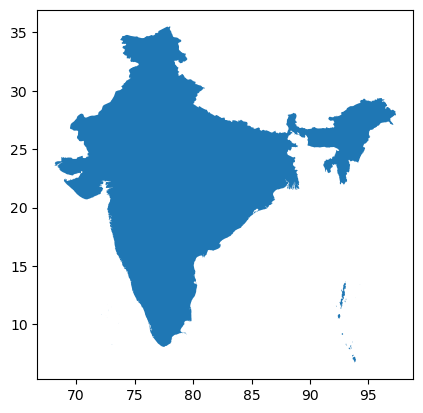

In [31]:
india.plot()

In [32]:
india

,geometry,ADMIN,ISO_A3
104,"MULTIPOLYGON (((93.85532 7.21418, 93.86500 7.2...",India,IND


In [36]:
def extract_lat_lon(geometry):
    lon, lat = geometry.centroid.coords[0]  # Extract centroid coordinates
    return lat, lon

# Apply the function to the geometry column and create new columns for latitude and longitude
ind['latitude'], ind['longitude'] = zip(*ind['geometry'].apply(extract_lat_lon))

# Access the latitude and longitude values
latitude_values = ind['latitude'].values
longitude_values = ind['longitude'].values

In [44]:
india['geometry']

104    MULTIPOLYGON (((93.85532 7.21418, 93.86500 7.2...
Name: geometry, dtype: geometry

In [47]:
ind_coords = india['geometry'].get_coordinates()

In [48]:
# get coordinates that are within our boundaries
ind_coords.head()

,x,y
104,93.855317,7.214179
104,93.865001,7.200670
104,93.870372,7.180569
104,93.876720,7.163560
104,93.880626,7.144273


In [51]:
type(ind_coords)

pandas.core.frame.DataFrame

In [53]:
df = ind_coords.query('60<x<80 and 5<y<25')

<Axes: xlabel='x', ylabel='y'>

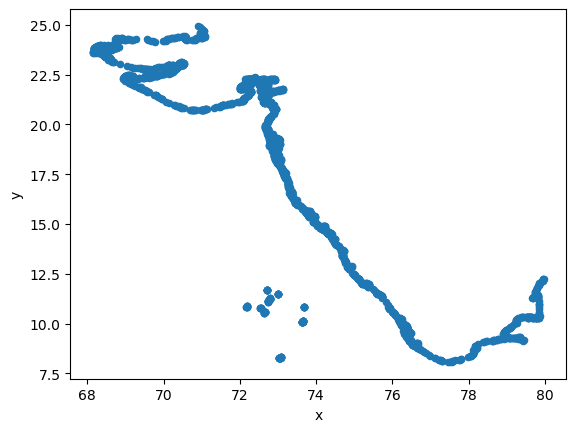

In [56]:
df.plot.scatter(x='x', y='y')

In [58]:
df.to_csv('era5/india_bounds.csv')